<a href="https://colab.research.google.com/github/matthewzelten/lab-2-phase-2-matthewzelten/blob/main/Copy_of_DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Matthew_and_Colin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [ ]:
import pandas as pd
df_expend = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df_expend.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


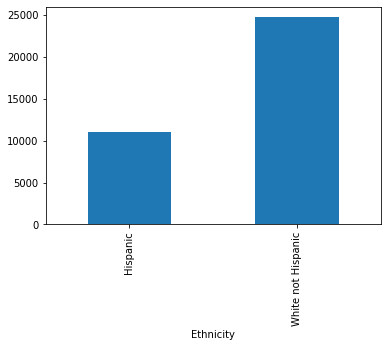

In [ ]:
avg = df_expend.groupby(["Ethnicity"])["Expenditures"].mean()
avg = avg[[3,7]]
avg.plot.bar()

**YOUR EXPLANATION HERE**

As seen in the bar plot above, the average expenditures of White not hispanic residents is rouhgly 25000 while the average expenditures of Hispanic residents is a little over 10000, so from this analysis, the White not hispanics have much higher average expenditures.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

Ethnicity           Age Cohort
American Indian     13 to 17       3726.000000
                    22 to 50      28205.000000
                    51+           56911.000000
Asian               0 to 5         1502.250000
                    13 to 17       3509.100000
                    18 to 21       9598.170732
                    22 to 50      39580.517241
                    51+           54622.615385
                    6 to 12        2164.555556
Black               0 to 5         1083.000000
                    13 to 17       4521.750000
                    18 to 21       8847.444444
                    22 to 50      40573.058824
                    51+           54010.142857
                    6 to 12        2476.454545
Hispanic            0 to 5         1393.204545
                    13 to 17       3955.281553
                    18 to 21       9959.846154
                    22 to 50      40924.116279
                    51+           55585.000000
                    6 to 12  

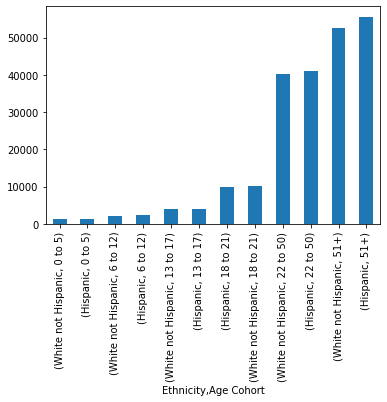

In [ ]:
# YOUR CODE HERE

avg = df_expend.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean()
avg[["Hispanic", "White not Hispanic"]].sort_values().plot.bar(stacked=True)
avg

**YOUR EXPLANATION HERE**

As seen in this plot, the average expenditures across each age cohort and the two ethnicities appears to be nearly identical. Therefore, there must be some other factor affecting the expenditures we saw in the first plot.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

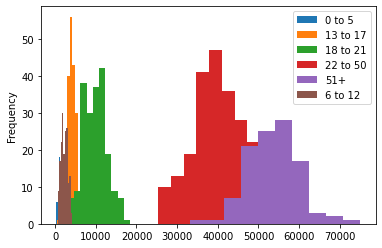

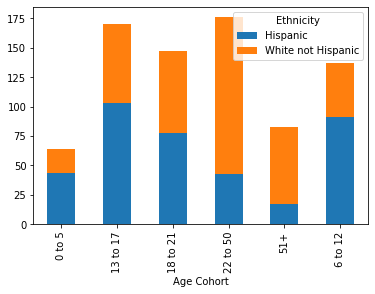

In [ ]:
# YOUR CODE HERE (although you may want to add more code cells)

df_expend.groupby(["Age Cohort"])["Expenditures"].plot.hist(legend=True)
cross = pd.crosstab(df_expend["Age Cohort"], df_expend["Ethnicity"])
cross.loc[slice(None), ["Hispanic", "White not Hispanic"]].plot.bar(stacked=True)

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

The first plot shows the distribution of the expenditures by age cohort and the 
second shows the number of individuals in each age cohort by ethnicity. In the second plot, we clearly see that there are a much large number of White individuals aged 22-50 and also 51+. Additionally, we can see that the first plot shows that those two cohorts show the highest expenditures. Therefore, we can determine that the initial plot we made in question 1 was skewed becasue the White not Hispanic ethnicity has far more individuals in the cohort that spend more. The plot in question 2 does not show the same bias and is the better plot for comparing the expenditures between the ethnicities.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.